In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [258]:
df = pd.read_csv('top_insta_influencers_data.csv')
# Remove "%" from relevant columns
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '', regex=False)

# Define a function to remove units without affecting the decimal points
def remove_units(value):
    # Use regular expression to remove units and keep the decimal point
    return float(''.join(filter(lambda x: x.isdigit() or x == '.', str(value))))

# Apply the function to relevant columns
for col in ['followers', 'avg_likes', 'new_post_avg_like', 'total_likes', 'posts']:
    df[col] = df[col].apply(remove_units)

# Convert the entire DataFrame to numeric
df = df.apply(pd.to_numeric, errors='ignore')

# Print the modified DataFrame
print(df)

     rank channel_info  influence_score  posts  followers  avg_likes  \
0       1    cristiano               92   3.30      475.8        8.7   
1       2  kyliejenner               91   6.90      366.2        8.3   
2       3     leomessi               90   0.89      357.3        6.8   
3       4  selenagomez               93   1.80      342.7        6.2   
4       5      therock               91   6.80      334.1        1.9   
..    ...          ...              ...    ...        ...        ...   
195   196    iambeckyg               71   2.30       33.2      623.8   
196   197   nancyajram               81   3.80       33.2      390.4   
197   198  luansantana               79   0.77       33.2      193.3   
198   199    nickjonas               78   2.30       33.0      719.6   
199   200    raisa6690               80   4.20       32.8      232.2   

    60_day_eng_rate  new_post_avg_like  total_likes        country  
0              1.39                6.5         29.0          Spain

In [259]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.30,475.8,8.7,1.39,6.5,29.0,Spain
1,2,kyliejenner,91,6.90,366.2,8.3,1.62,5.9,57.4,United States
2,3,leomessi,90,0.89,357.3,6.8,1.24,4.4,6.0,NaN
3,4,selenagomez,93,1.80,342.7,6.2,0.97,3.3,11.5,United States
4,5,therock,91,6.80,334.1,1.9,0.20,665.3,12.5,United States


Regression Line: y = 0.04x + 78.39


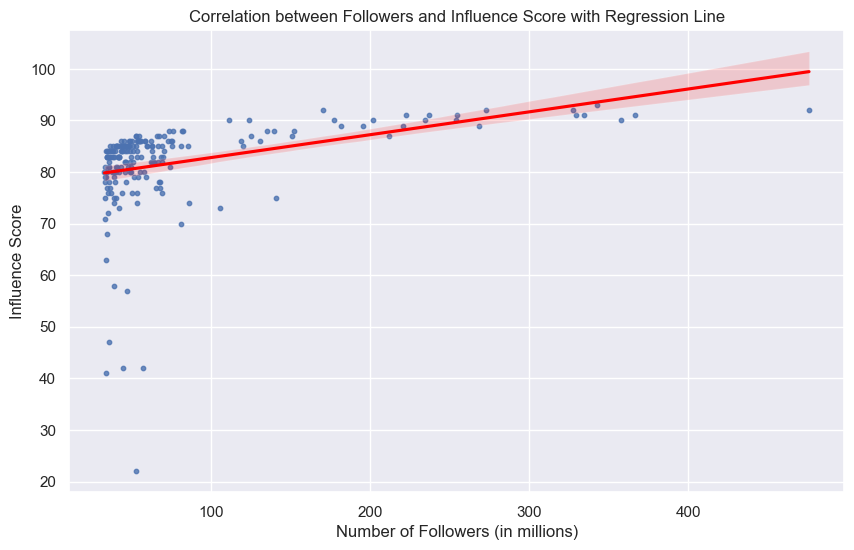

In [260]:
# Question: How does the number of followers correlate with the influence score?
# Scatter plot with regression line 
plt.figure(figsize=(10, 6))
sns.regplot(x='followers', y='influence_score', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Calculate the regression line 
x = df['followers']
y = df['influence_score']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Print the regression equation
equation = f'Regression Line: y = {slope:.2f}x + {intercept:.2f}'
print(equation)

# Set plot labels and title
plt.title('Correlation between Followers and Influence Score with Regression Line')
plt.xlabel('Number of Followers (in millions)')
plt.ylabel('Influence Score')

# Show the plot
plt.show()

First off, what is an influence score and how does that relate to the number of followers someone has on Instagram? An influence score, often used in the context of social media, is a numerical representation of a user's impact, reach, or influence within a particular platform. It is basically a rating of how entertaining, popular, or convincing a person is online. So, if the influence score is a measure of how impactful you are, does that mean the number of followers you have on Instagram affects that score? 

Based on the scatterplot, there seems to be a positive correlation between the number of followers and influence score. As the number of followers increases, the influence score also increases. This means that there is a linear relationship between these two variables. A best-fit line has been drawn to indicate this relationship. Based on the regression line, an increase of one million followers corresponds to an expected increase of 0.04 points in influence score. Wow! That is a lot of followers needed to just increase the influence score, but these people are top influencers so they can get millions easily. However, there is a significant amount of outliers, which indicates that there are other things that affect the influence score as well. This could be the number of likes in each post, content quality, or partnerships. 

The number of top influencers for the top country (United States) is: 66


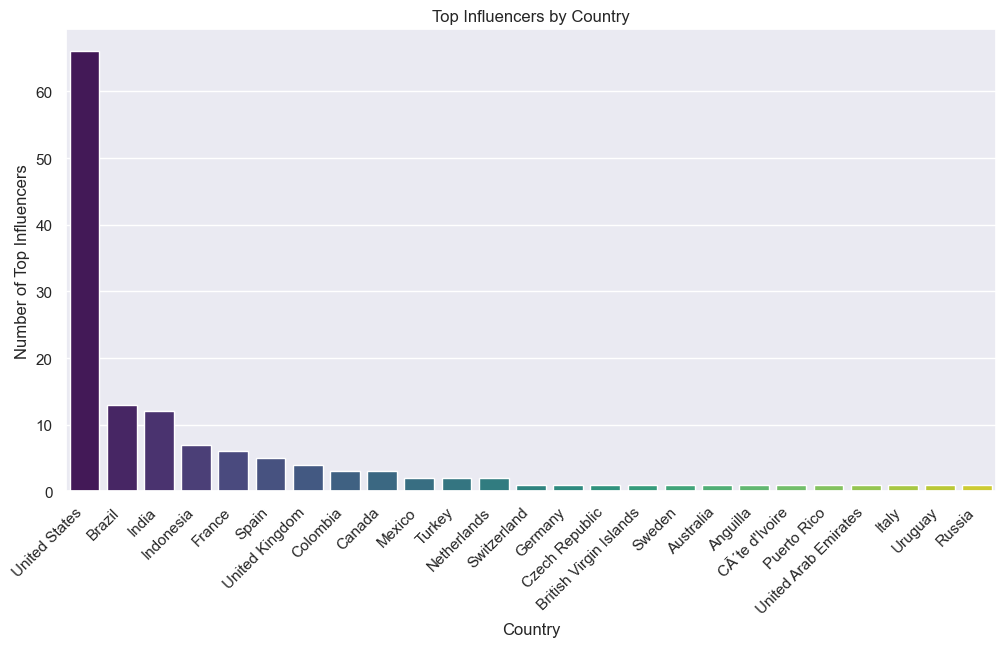

In [136]:
# Question: What are the top 10 countries in terms of the number of top influencers?
# Group by 'Country' and count the number of influencers in each country
country_counts = df['country'].value_counts()
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette='viridis', dodge=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Top Influencers')
plt.title('Top Influencers by Country')

# Get the top country (country with the most influencers)
top_country = country_counts.idxmax()


# Filter the DataFrame for the top 10 country
top_country_df = df[df['country'] == top_country]

# Get the number of top influencers for the top country
number_of_top_influencers = len(top_country_df)

print(f"The number of top influencers for the top country ({top_country}) is: {number_of_top_influencers}")

# Show the plot
plt.show()

Here is a bar graph showing countries and the count of top influencers from each. Based on the results, one could say that the top 10 countries in terms of the number of top influencers are the United States, Brazil, India, Indonesia, France, Spain, United Kingdom, Colombia, Canada, and Mexico. And the United States by far has the greatest number of top influencers with a shocking amount of 66. The country with the least top influence is Russia. 

Influencers with High Influence Scores and Lower Follower Counts:
Influencer: natgeo, Influence Score: 91, Followers: 237.0M
Influencer: taylorswift, Influence Score: 91, Followers: 222.2M
Influencer: katyperry, Influence Score: 92, Followers: 170.3M


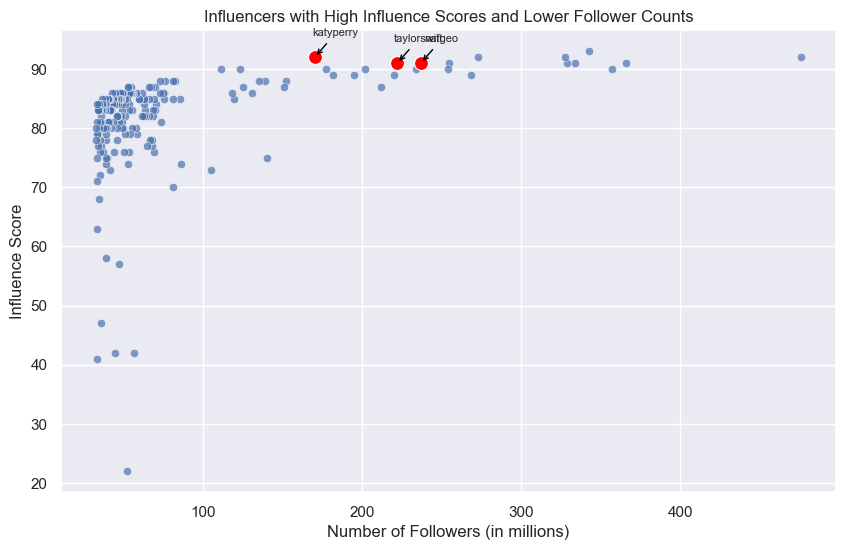

In [179]:
# Which influencers have the highest influence score but relatively fewer followers?

# Set a threshold for influence score and followers
threshold_influence = 90
threshold_followers = 250

# Filter influencers with high influence scores but lower follower counts
filtered_df = df[(df['influence_score'] > threshold_influence) & (df['followers'] < threshold_followers)]

# Print out the influencers that meet the thresholds
print("Influencers with High Influence Scores and Lower Follower Counts:")
for index, row in filtered_df.iterrows():
    print(f"Influencer: {row['channel_info']}, Influence Score: {row['influence_score']}, Followers: {row['followers']}M")

# Scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='influence_score', data=df, alpha=0.7)
sns.scatterplot(x='followers', y='influence_score', data=filtered_df, color='red', s=100)  # Highlighted points

# Annotate the highlighted influencers with arrows
for index, row in filtered_df.iterrows():
    plt.annotate(row['channel_info'], (row['followers'], row['influence_score']),
                 textcoords="offset points", xytext=(15, 15), ha='center', fontsize=8,
                 arrowprops=dict(arrowstyle='->', color='black'))

# Set plot labels and title
plt.title('Influencers with High Influence Scores and Lower Follower Counts')
plt.xlabel('Number of Followers (in millions)')
plt.ylabel('Influence Score')

# Show the plot
plt.show()

Here is a scatterplot that shows influencers based on their number of followers and influence scores. Each point represents an influencer, and the color-coded red points indicate those who have high influence scores (above 90) but relatively fewer followers (below 250). Upon examining the graph, it is shown that influencers such as Katy Perry, Taylor Swift, and Natgeo stand out for having exceptionally high influence scores compared to their follower counts. These individuals manage to demonstrate a significant impact or influence despite not having the largest follower base. Thus, this also supports the fact that the amount of followers is not the only variable that affects influence score.

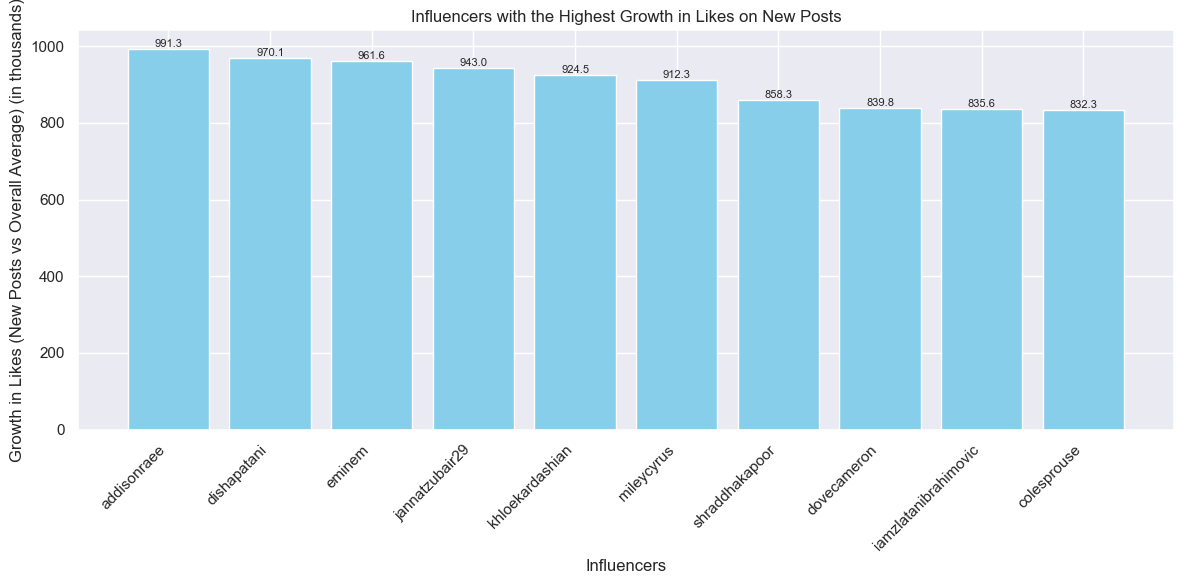

In [182]:
# Which ten influencers have the highest growth in average likes on new posts compared to their overall average?
# Calculate the growth in average likes on new posts compared to overall average
df['growth_in_likes'] = df['new_post_avg_like'] - df['avg_likes']

# Sort the DataFrame by growth in likes in descending order
sorted_df = df.sort_values(by='growth_in_likes', ascending=False)

# Select the top N influencers with the highest growth 
top_n = 10
top_influencers = sorted_df.head(top_n)

# Bar chart to visualize influencers with the largest growth in likes on new posts
plt.figure(figsize=(12, 6))
bars = plt.bar(top_influencers['channel_info'], top_influencers['growth_in_likes'], color='skyblue')

# Add labels and title
plt.xlabel('Influencers')
plt.ylabel('Growth in Likes (New Posts vs Overall Average) (in thousands)')
plt.title('Influencers with the Highest Growth in Likes on New Posts')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here is a bar chart that illustrate the influencers who have experienced the highest growth in average likes on new posts compared to their overall average likes. Each bar represents an influencer, and the height of the bar indicates the extent of growth in likes. Upon analyzing the chart, it is shown that influencers such as addisonraee, dishapatani, eminem, jannatzubair29, khloekardashian, mileycyrus, shraddhakapoor, dovecameron, iamzlantanibrahimovic, and colesprouse stand out for their remarkable growth in likes on new posts. These individuals have achieved a substantial increase in engagement on their recent content compared to their previous average. This growth either indicates a positive trend in audience engagement or appreciation for their newer content. With this new information, we can look further into stuff like analyzing influencers' content strategies and their ability to capture audience interest over time.

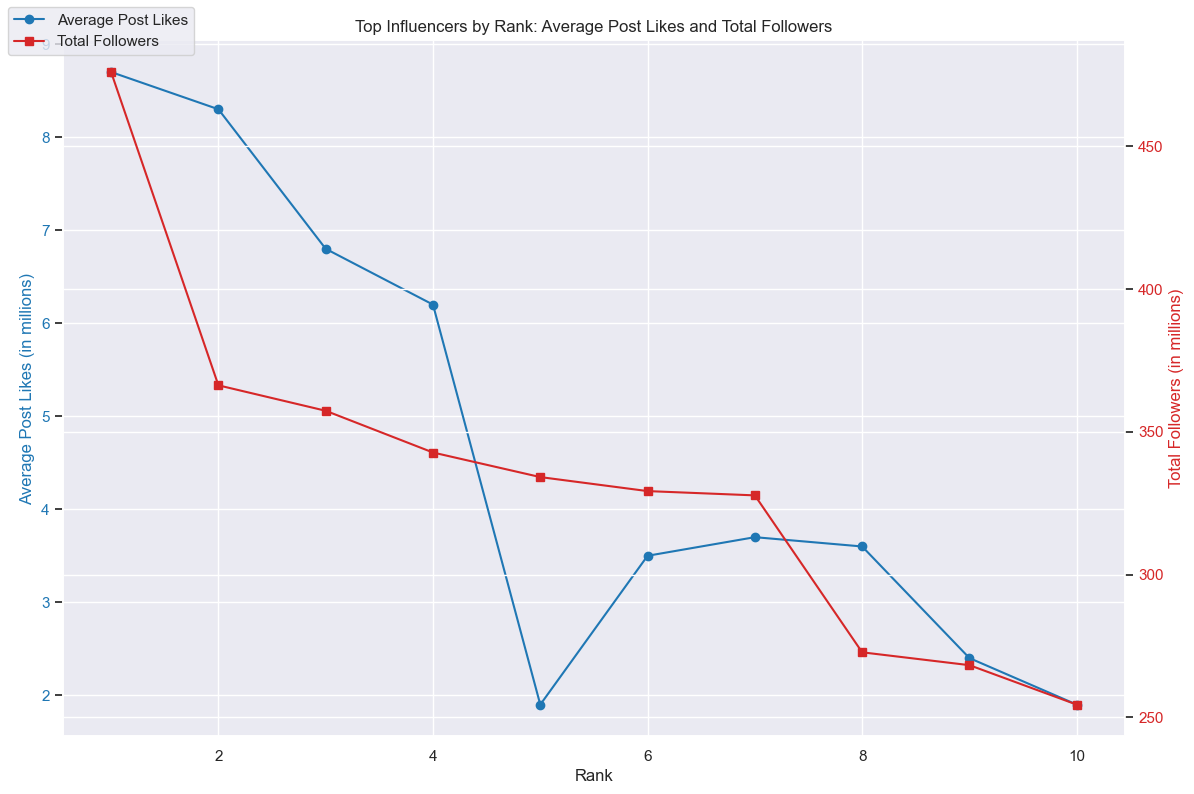

In [191]:
# Question: How do the top ten influencers by rank differ in terms of their average post likes and total followers?
# Sort the DataFrame by rank
sorted_df = df.sort_values(by='rank')

# Select the top N influencers 
top_n = 10
top_influencers = sorted_df.head(top_n)

# Create a dual-axis line chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the average post likes on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Rank')
ax1.set_ylabel('Average Post Likes (in millions)', color=color)
ax1.plot(top_influencers['rank'], top_influencers['avg_likes'], color=color, marker='o', label='Average Post Likes')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for total followers
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Followers (in millions)', color=color)
ax2.plot(top_influencers['rank'], top_influencers['followers'], color=color, marker='s', label='Total Followers')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Top Influencers by Rank: Average Post Likes and Total Followers')
fig.tight_layout()
fig.legend(loc='upper left')

# Show the plot
plt.show()

Here is a dual-axis line chart illustrating the differences among the top ten influencers based on their ranks, focusing on two key metrics: average post likes and total followers.

On the left y-axis, the blue line represents the average post likes for each influencer, indicating the level of engagement their content generates. The points on the line denote specific influencers, and the trend showcases variations in the popularity of their posts.

For the right y-axis, it features a red line representing the total number of followers for each influencer. The point on this line provide insights into the scale of their audiences.

Examining both lines together will allow for observations on the correlation between average post likes and total followers. Influencers positioned higher on the blue line might have a higher engagement rate relative to their follower count.

Based on the graph, we can say that as the rank goes down, the level of engagement is lower due to the decrease in average post likes and total followers. This information provides valuable insights into the influencers' performance and shows us what it takes to be a high-rank influencer. 

Top and Bottom Countries with Average Posts per Influencer on Instagram:
                   country  posts_per_influencer
3   British Virgin Islands             10.000000
9                  Germany              9.300000
12                   Italy              8.900000
11               Indonesia              8.068571
14             Netherlands              7.750000
18                  Sweden              7.300000
5                 Colombia              6.433333
22          United Kingdom              6.100000
20                  Turkey              5.000000
17                   Spain              4.620000
21    United Arab Emirates              2.300000
10                   India              2.025000
19             Switzerland              1.800000
0                 Anguilla              1.700000
13                  Mexico              1.245000
24                 Uruguay              1.200000
1                Australia              0.880000
7           CÃ´te d'Ivoire              0.580

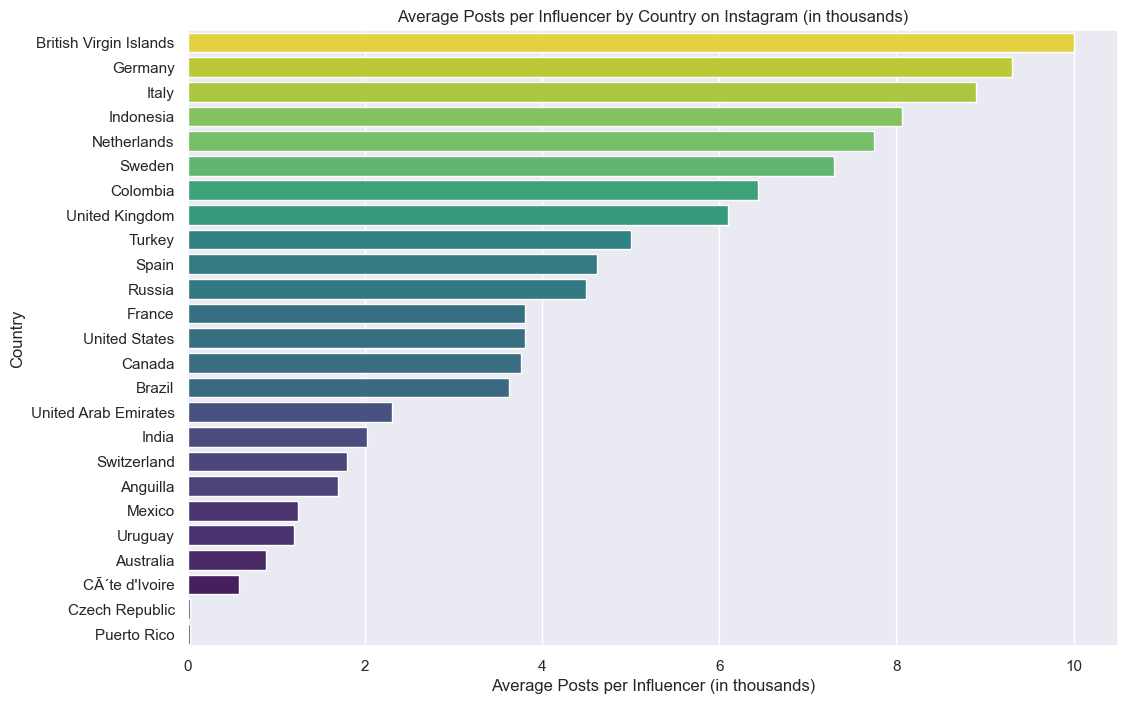

In [255]:
# # Are there countries where social media activity is particularly high or low?
# Calculate total posts and unique influencers per country
country_post_frequency = df.groupby('country').agg({'posts': 'sum', 'channel_info': 'nunique'}).reset_index()

# Calculate average posts per influencer
country_post_frequency['posts_per_influencer'] = country_post_frequency['posts'] / country_post_frequency['channel_info']

# Sort countries based on average posts per influencer in descending order
sorted_countries = country_post_frequency.sort_values(by='posts_per_influencer', ascending=False)

# Display the countries with the highest and lowest average posts per influencer
top_countries = sorted_countries.head(10)
bottom_countries = sorted_countries.tail(10)

# Create a table with relevant information
table_data = pd.concat([top_countries, bottom_countries])

# Display the table
print("Top and Bottom Countries with Average Posts per Influencer on Instagram:")
print(table_data[['country', 'posts_per_influencer']])

# Create a bar plot to visualize average posts per influencer by country
plt.figure(figsize=(12, 8))
sns.barplot(x='posts_per_influencer', y='country', data=sorted_countries, palette='viridis', hue='posts_per_influencer', legend=False)
plt.title('Average Posts per Influencer by Country on Instagram (in thousands)')
plt.xlabel('Average Posts per Influencer (in thousands)')
plt.ylabel('Country')

# Show the plot
plt.show()

Based on the graph, it seems like people are socially active on Instagram in countries like British Virgin Islands, Germany, Italy, Indonesia, and etc. Each influencer in that country has at least 10 posts. 

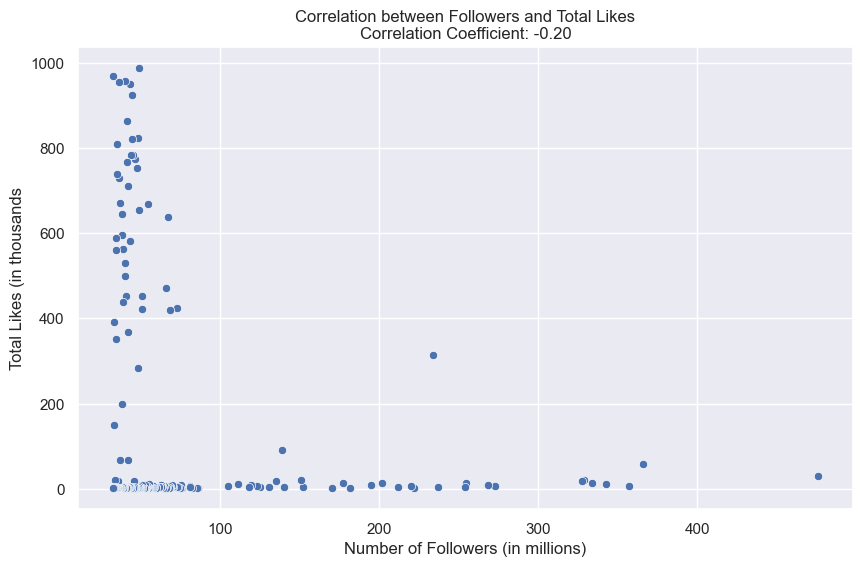

Correlation Coefficient between Followers and Total Likes: -0.20


In [281]:
# Question: Does the number of followers affect the amount of likes an influencer gets?

# Drop rows with missing values in 'followers' or 'total_likes'
df_cleaned = df[['followers', 'total_likes']].dropna()

# Calculate the correlation coefficient
correlation_coefficient = df_cleaned['followers'].corr(df_cleaned['total_likes'])

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='total_likes', data=df_cleaned)
plt.title(f'Correlation between Followers and Total Likes\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Number of Followers (in millions)')
plt.ylabel('Total Likes (in thousands')

# Show the plot
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient between Followers and Total Likes: {correlation_coefficient:.2f}")


Average Influence Scores by Country:
                   country  influence_score
0                 Anguilla        83.000000
1                Australia        86.000000
2                   Brazil        77.769231
3   British Virgin Islands        77.000000
4                   Canada        86.000000
5                 Colombia        83.666667
6           Czech Republic        47.000000
7           CÃ´te d'Ivoire        85.000000
8                   France        75.500000
9                  Germany        79.000000
10                   India        81.750000
11               Indonesia        80.571429
12                   Italy        86.000000
13                  Mexico        73.000000
14             Netherlands        82.000000
15             Puerto Rico        80.000000
16                  Russia        63.000000
17                   Spain        78.800000
18                  Sweden        83.000000
19             Switzerland        85.000000
20                  Turkey        81.00

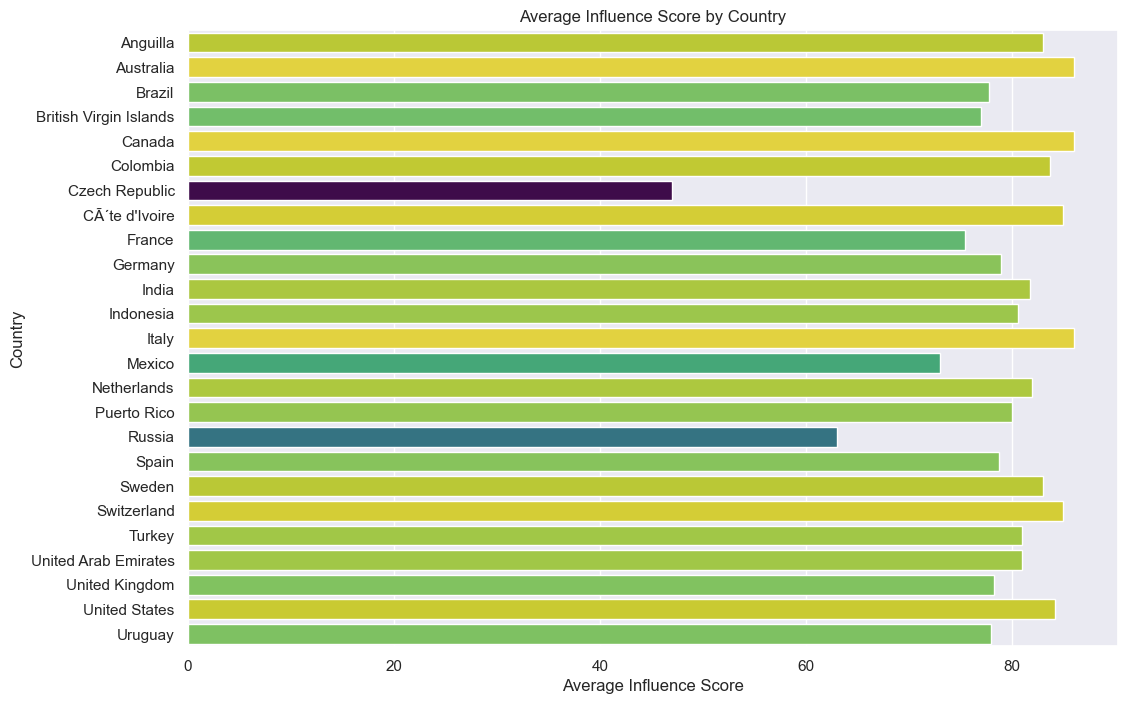

In [283]:
# Which country has the highest average influence score?
# Convert 'influence_score' to numeric, handling errors by coercing to NaN
df['influence_score'] = pd.to_numeric(df['influence_score'], errors='coerce')

# Group by country and calculate the average influence score
country_avg_influence = df.groupby('country')['influence_score'].mean().reset_index()

# Find the country with the highest average influence score
max_avg_influence_country = country_avg_influence.loc[country_avg_influence['influence_score'].idxmax()]

# Display the DataFrame with average influence scores
print("Average Influence Scores by Country:")
print(country_avg_influence)

# Display the country with the highest average influence score
print("\nCountry with the Highest Average Influence Score:")
print(max_avg_influence_country[['country', 'influence_score']])

# Create a bar plot to visualize average influence scores by country
plt.figure(figsize=(12, 8))
sns.barplot(x='influence_score', y='country', data=country_avg_influence, palette='viridis', hue='influence_score', legend=False)
plt.title('Average Influence Score by Country')
plt.xlabel('Average Influence Score')
plt.ylabel('Country')

# Show the plot
plt.show()

Based on the bar graph and the table, it seems like Australia has the highest average influence score based on the influencers residing in that country. This could mean that the influencers there have a large number of followers and they produce high-quality, relevant, and engaging content 

Correlation Coefficient: 0.1600676547477424


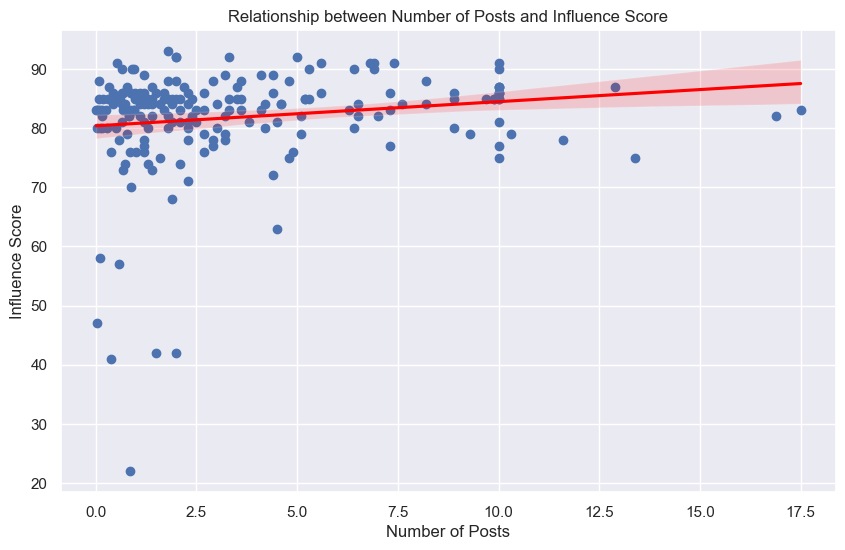

In [288]:
# Question: Does the number of posts have an effect on the influence score?
# Convert 'influence_score' and 'posts' to numeric, handling errors by coercing to NaN
df['influence_score'] = pd.to_numeric(df['influence_score'], errors='coerce')
df['posts'] = pd.to_numeric(df['posts'], errors='coerce')

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='posts', y='influence_score', data=df, scatter_kws={'alpha':1}, line_kws={'color': 'red'})
plt.title('Relationship between Number of Posts and Influence Score')
plt.xlabel('Number of Posts')
plt.ylabel('Influence Score')

# Calculate the correlation coefficient
correlation_coefficient = df['posts'].corr(df['influence_score'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Show the plot
plt.show()

Based on the correlation coefficient, the number of posts has an impact because the slope is going upward by 0.16. However, if you were to look at the scatterplot, the data points are pretty consistent over time. The regression line is almost flat which indicates that there is only a small effect.

Correlation Coefficient (Excluding Outliers): 0.8613097584434147


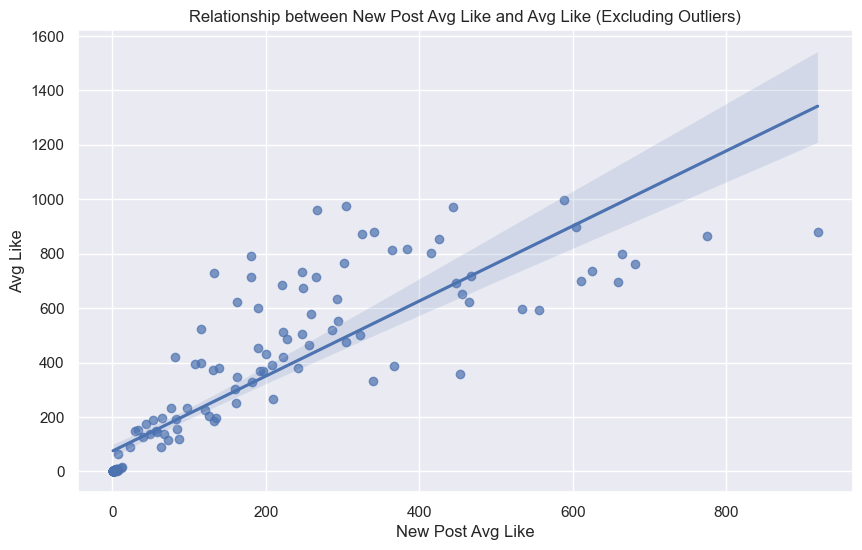

New Post Avg Like Summary Statistics (Excluding Outliers):
count    151.000000
mean     153.185430
std      195.350718
min        1.000000
25%        2.200000
50%       66.800000
75%      247.200000
max      918.900000
Name: new_post_avg_like, dtype: float64

Avg Like Summary Statistics (Excluding Outliers):
count    151.000000
mean     285.852318
std      312.685589
min        1.100000
25%        3.500000
50%      157.400000
75%      520.050000
max      996.200000
Name: avg_likes, dtype: float64
Segmented Data by Country (Excluding Outliers):
                        new_post_avg_like   avg_likes
country                                              
Australia                        2.100000    2.800000
Brazil                         232.640000  497.370000
British Virgin Islands          64.600000  197.900000
Canada                           1.566667    2.466667
Colombia                       139.300000  381.600000
Czech Republic                 285.900000  518.100000
CÃ´te d'Ivoire    

In [298]:
# Question: How does the engagement on new posts compare to the overall average engagement?

# Convert columns to numeric, handling errors by coercing to NaN
df['new_post_avg_like'] = pd.to_numeric(df['new_post_avg_like'], errors='coerce')
df['avg_likes'] = pd.to_numeric(df['avg_likes'], errors='coerce')

# Calculate percent difference
df['percent_diff'] = ((df['new_post_avg_like'] - df['avg_likes']) / df['avg_likes']) * 100

# Define a threshold for percent difference (I want to get rid of outliers since it adds a lot of variability into my graph) 
percent_diff_threshold = 90

# Filter data to exclude rows where percent difference exceeds the threshold
filtered_df = df[abs(df['percent_diff']) <= percent_diff_threshold]

# Create a scatter plot with regression line for the filtered data
plt.figure(figsize=(10, 6))
sns.regplot(x='new_post_avg_like', y='avg_likes', data=filtered_df, scatter_kws={'alpha': 0.7})
plt.title('Relationship between New Post Avg Like and Avg Like (Excluding Outliers)')
plt.xlabel('New Post Avg Like')
plt.ylabel('Avg Like')

# Calculate the correlation coefficient for the filtered data
correlation_coefficient = filtered_df['new_post_avg_like'].corr(filtered_df['avg_likes'])
print(f"Correlation Coefficient (Excluding Outliers): {correlation_coefficient}")

# Show the plot
plt.show()

# Summary statistics for filtered data
new_post_avg_like_stats_filtered = filtered_df['new_post_avg_like'].describe()
avg_likes_stats_filtered = filtered_df['avg_likes'].describe()

print("New Post Avg Like Summary Statistics (Excluding Outliers):")
print(new_post_avg_like_stats_filtered)

print("\nAvg Like Summary Statistics (Excluding Outliers):")
print(avg_likes_stats_filtered)

# Example: Segment by country for filtered data
segmented_data_filtered = filtered_df.groupby('country')[['new_post_avg_like', 'avg_likes']].mean()

# Display segmented data for filtered data
print("Segmented Data by Country (Excluding Outliers):")
print(segmented_data_filtered)


By exploring this relationship, I can gain insights into whether influencers tend to receive similar levels of engagement on their new posts as they do on their overall content. The correlation coefficient and scatter plot provide a quantitative and visual representation of the strength and direction of this relationship

Other questions that could be answered: 
- Does the relationship between new post engagement and overall engagement vary across different influencers?
- Are there differences in the engagement patterns between influencers from different countries
- Is there a consistent pattern in the engagement behavior of influencers over time?